In [40]:
import requests
from IPython.core.display import HTML

# Non-linear decision boundary
The following exercise experiments with a dataset (see visualization in the cell below), where a linear model cannot seperate the different classes in the data.

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#linear">Task 1: Non-linear decision boundary</a>
            </li>
            <li>
            <a href="#manual">Task 2: Circular boundary</a>
            </li>
            <li>
            <a href="#predict2">Task 3: Predictions for non-linear data</a>
            </li>
            <li>
            <a href="#predict53">Task 4: Predictions for non-linear data</a>
            </li>
            <li>
            <a href="#polar">Task 5: Polar coordinates</a>
            </li>
        </ul>
    </div>
</article>

Run the cell below to load libraries and functions and construct the dataset:


In [41]:
import numpy as np  # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

def accuracy(predictions, targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.
    
    :return: fraction of correctly predicted points (num_correct/num_points).
    """
    acc = np.sum(predictions == targets) / len(predictions)
    return acc

def recall(predictions, targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.
    
    :return: fraction of actual positives that were correctly identified.
    """
    true_positives = np.sum((predictions == 1) & (targets == 1))
    actual_positives = np.sum(targets == 1)
    return true_positives / actual_positives

def precision(predictions, targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.
    
    :return: fraction of positive predictions that were correct.
    """
    true_positives = np.sum((predictions == 1) & (targets == 1))
    total_positives = np.sum(predictions == 1)
    return true_positives / total_positives

def false_positive_rate(predictions, targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.
    
    :return: fraction of actual negatives that were incorrectly identified as positive.
    """
    false_positives = np.sum((predictions == 1) & (targets == -1))
    actual_negatives = np.sum(targets == -1)
    return false_positives / actual_negatives

def f1_score(predictions, targets):
    prec = precision(predictions, targets)
    rec = recall(predictions, targets)
    if prec + rec == 0:
        return 0.0
    return 2 * (prec * rec) / (prec + rec)

def matthews_corrcoef(predictions, targets):
    tp = np.sum((predictions == 1) & (targets == 1))
    tn = np.sum((predictions == -1) & (targets == -1))
    fp = np.sum((predictions == 1) & (targets == -1))
    fn = np.sum((predictions == -1) & (targets == 1))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp + 1e-10) * (tp + fn + 1e-10) * (tn + fp + 1e-10) * (tn + fn + 1e-10))
    return numerator / denominator

### Data generation
q1 = np.random.multivariate_normal([0, 0], [[.5, 0], [0, .5]], 400)

t = np.linspace(0, 2 * np.pi, 400)
q2 = np.array([(3 + q1[:, 0]) * np.sin(t), (3 + q1[:, 1]) * np.cos(t)]).T


The data of the two classes (`class 1`
 and `class 2`
) are stored in the variables `q1`
 and `q2`
, respectively. The following cell visualize the dataset of the two classes. `class 1`
 is labelled with 0s and `class 2`
 with 1s.


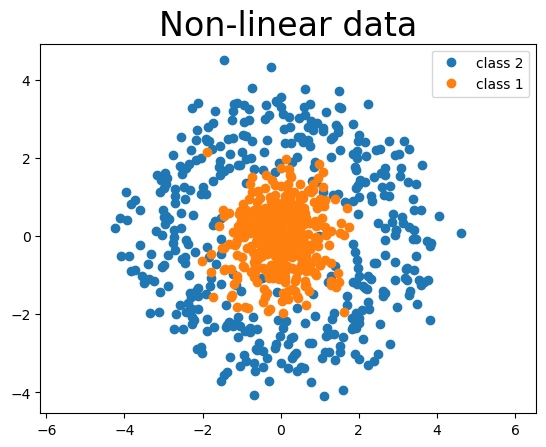

In [42]:
fig, ax = plt.subplots()
ax.plot(q2[:, 0], q2[:, 1], "o", label='class 2')
ax.plot(q1[:, 0], q1[:, 1], "o", label='class 1')

plt.title("Non-linear data", fontsize=24)
ax.axis('equal')
plt.legend()
plt.show()


---
**Task 1 (easy): Non-linear decision boundary👩‍💻💡**
The graph below shows how linear model performs on the current dataset (see last week
 ).
1. Using your observations about linear classification models, explain whether a linear classifier is an appropriate solution for the current data.
2. Which other models might provide a better fit to this dataset?


---

## Task 1 reflection

**Is a linear classifier an appropriate solution for this data?**
No, a linear classifier is not an appropriate solution for this data. The scatter plot shows that the data distribution is non-linear, with the two classes clearly separated in a circular pattern. A linear boundary would misclassify many data points.

**Which other models might provide a better fit?**
* Support Vector Machines (SVM) using the kernel trick.
* Decision Trees: These can create complex decision boundaries that adapt to the data's distribution.
* K-Nearest Neighbors (KNN): This non-parametric method can adapt to any shape of the data distribution based on proximity.


---
**Task 2 (easy): Circular boundary💡**
In this task the prediction function $f_w(x)$ is defined as a circular boundary centered in $[0,0]^T$.
1. Run the cell below to plot the circular boundary and the data points.
2. Change the radius of the decision boundary and determine which radius seems to best separate the classes?
3. Change the decision boundary and investigate how this affects the balance between false positives and false negatives? How does an overly large or small radius affect false positives and false negatives respectively? 


**Understanding the code**
The parametric equation of a circle, ([described in detail here](https://mathopenref.com/coordparamcircle.html)
) is given by:

$$
x = r \cos(t) \\
y = r \sin(t)
$$
where  $r$  is the radius of the circle and  $t$  represents angles (in radians) that range from  0  to  $2\pi$ .


---

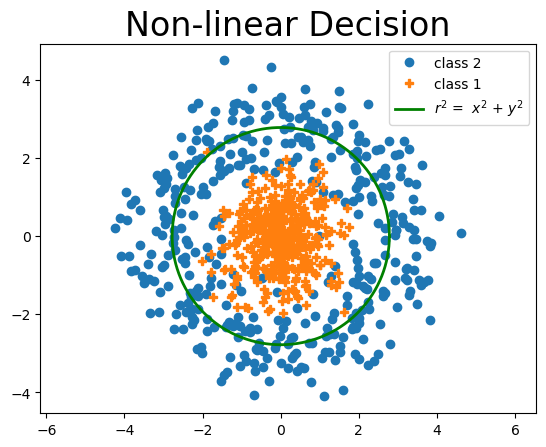

In [47]:
def circle_boundary(t, radius):
    """
    :param t: angle data points of the circle. 
    :param radius: radius of the circle
    :return: (x-values,y-values) of the circle points .
    """
    return (radius * np.cos(t), radius * np.sin(t))


fig, ax = plt.subplots()
ax.plot(q2[:, 0], q2[:, 1], "o", label='class 2')
ax.plot(q1[:, 0], q1[:, 1], "P", label='class 1')

t = np.linspace(0, 2 * np.pi, 400)  ### linspace of angles.
r = 2.78  # radius
x_c, y_c = circle_boundary(t, r)

ax.plot(x_c, y_c, "g",linewidth=2, label=r'$r^2$ =  $x^2$ + $y^2$')
plt.title("Non-linear Decision", fontsize=24)
ax.axis('equal')
plt.legend()
plt.show()

## Task 2 reflection

**Best radius** 1.67

**How does an overly large or small radius affect false positives and false negatives?**
* Overly large radius: More false positives for class 1, as some class 2 (should be negative) will be included within the circle (labeled positive)
* Overly small radius: With a smaller radius, points that should be in class 1 (inside the true boundary) may end up outside the boundary, increasing false negatives for class 1. Some points that belong to class 2 but are incorrectly classified as class 1, resulting in false positives for class 2.



---
**Task 3 (easy): Predictions for non-linear data👩‍💻**
This task is about using the circular decision boundary (parametrized by $r$)  to classify points. Since the points are centered in $[0,0]^T$ the classification function should just check whether the distance of the point to the center is smaller or greater than $r$. That is  $\sqrt{x^2 + y^2}≤r$, or equivalently,  $x^2 + y^2 ≤ r^2$.
The prediction function is given by $f_w(x)= x^2 + y^2 - r^2$ as the decision function must fulfill $f_w(x) = 0$ on the decision boundary
1. Comple the `predict_circle`
 function. The function should take radius and data ($(x, y)$ coordinates) as inputs and return an array of predicted classes based on the decision function, e.g.:    - -1 for points where  $x^2 + y^2 < r^2$  (inside the circle).
    - 1 for points where  $x^2 + y^2 > r^2$  (outside the circle).


2. Which choice of radius seems (visually) to best separate the two classes?
3. Use the `accuracy`
 function to get the fraction of correctly predicted data points. Try 10 different radius values and identify which one results in the highest accuracy.


---

In [48]:
def predict_circle(data, radius):
    distances = np.sqrt(data[:, 0]**2 + data[:, 1]**2)
    predictions = np.where(distances <= radius, 1, -1)
    return predictions

# Create target labels (assume q1 = -1, q2 = 1)
targets_q1 = np.full(q1.shape[0], 1)
targets_q2 = np.full(q2.shape[0], -1)

# Combine data and targets
data = np.vstack((q1, q2))
targets = np.concatenate((targets_q1, targets_q2))

# Test different radii for the best accuracy
best_accuracy = 0
best_radius = 0

for radius in np.linspace(1, 3, 10):
    predictions = predict_circle(data, radius)
    acc = accuracy(predictions, targets)
    rec = recall(predictions, targets)
    prec = precision(predictions, targets)
    fpr = false_positive_rate(predictions, targets)
    f1 = f1_score(predictions, targets)
    mcc = matthews_corrcoef(predictions, targets)
    print(f'Radius: {radius:.2f}, Accuracy: {acc:.3f}, Recall: {rec:.3f}, Precision: {prec:.3f}, F1: {f1:.3f}, MCC: {mcc:.3f}, False Positive Rate: {fpr:.3f}')

    if acc > best_accuracy:
        best_accuracy = acc
        best_radius = radius

print(f'A circular decision boundary with radius: {best_radius:.2f}, has an accuracy of: {best_accuracy:.3f}')

Radius: 1.00, Accuracy: 0.805, Recall: 0.613, Precision: 0.996, F1: 0.759, MCC: 0.661, False Positive Rate: 0.003
Radius: 1.22, Accuracy: 0.871, Recall: 0.748, Precision: 0.993, F1: 0.853, MCC: 0.766, False Positive Rate: 0.005
Radius: 1.44, Accuracy: 0.917, Recall: 0.843, Precision: 0.991, F1: 0.911, MCC: 0.845, False Positive Rate: 0.007
Radius: 1.67, Accuracy: 0.941, Recall: 0.917, Precision: 0.963, F1: 0.940, MCC: 0.883, False Positive Rate: 0.035
Radius: 1.89, Accuracy: 0.944, Recall: 0.958, Precision: 0.932, F1: 0.945, MCC: 0.888, False Positive Rate: 0.070
Radius: 2.11, Accuracy: 0.941, Recall: 0.988, Precision: 0.904, F1: 0.944, MCC: 0.886, False Positive Rate: 0.105
Radius: 2.33, Accuracy: 0.911, Recall: 0.993, Precision: 0.854, F1: 0.918, MCC: 0.834, False Positive Rate: 0.170
Radius: 2.56, Accuracy: 0.864, Recall: 0.998, Precision: 0.787, F1: 0.880, MCC: 0.755, False Positive Rate: 0.270
Radius: 2.78, Accuracy: 0.814, Recall: 0.998, Precision: 0.729, F1: 0.843, MCC: 0.675, F


---
**Task 4 (easy): Predictions for non-linear data💡**
In the cell below, reflect on:
1. Visually what is the optimal choice for radius of the classifier?
2. How does the type of the data influence the choice of "optimality" (you may include precision and recall in your arguments)? 


---

## Task 4 reflections

**Optimal radius**: 1.78

**How does the type of data influence the choice of "optimality"?**

It depends on what optimality is. 
* High recall (larger radius): If we want to make sure we get all true positives at the cost some false positives (e.g. for disease detection)
* High precision (smaller radius): If we instead wan't to only detect a positive when we are absolutely certain and therefore get some more false negatives (e.g. spam detection)

## Non-linear transformations to the data using polar coordinates
This task is about applying non-linear transformations to facilitate the use of a linear classifier. A point can be represented either by its Cartesian coordinates,  $x$, $y$ , or equivalently by its polar coordinates, defined by an angle $\theta$ and distance $r$ from the origin as shown in [Figure 1](#tensorboard). 
<div class="has-text-centered">
<figure class="image is-inline-block" id="tensorboard">

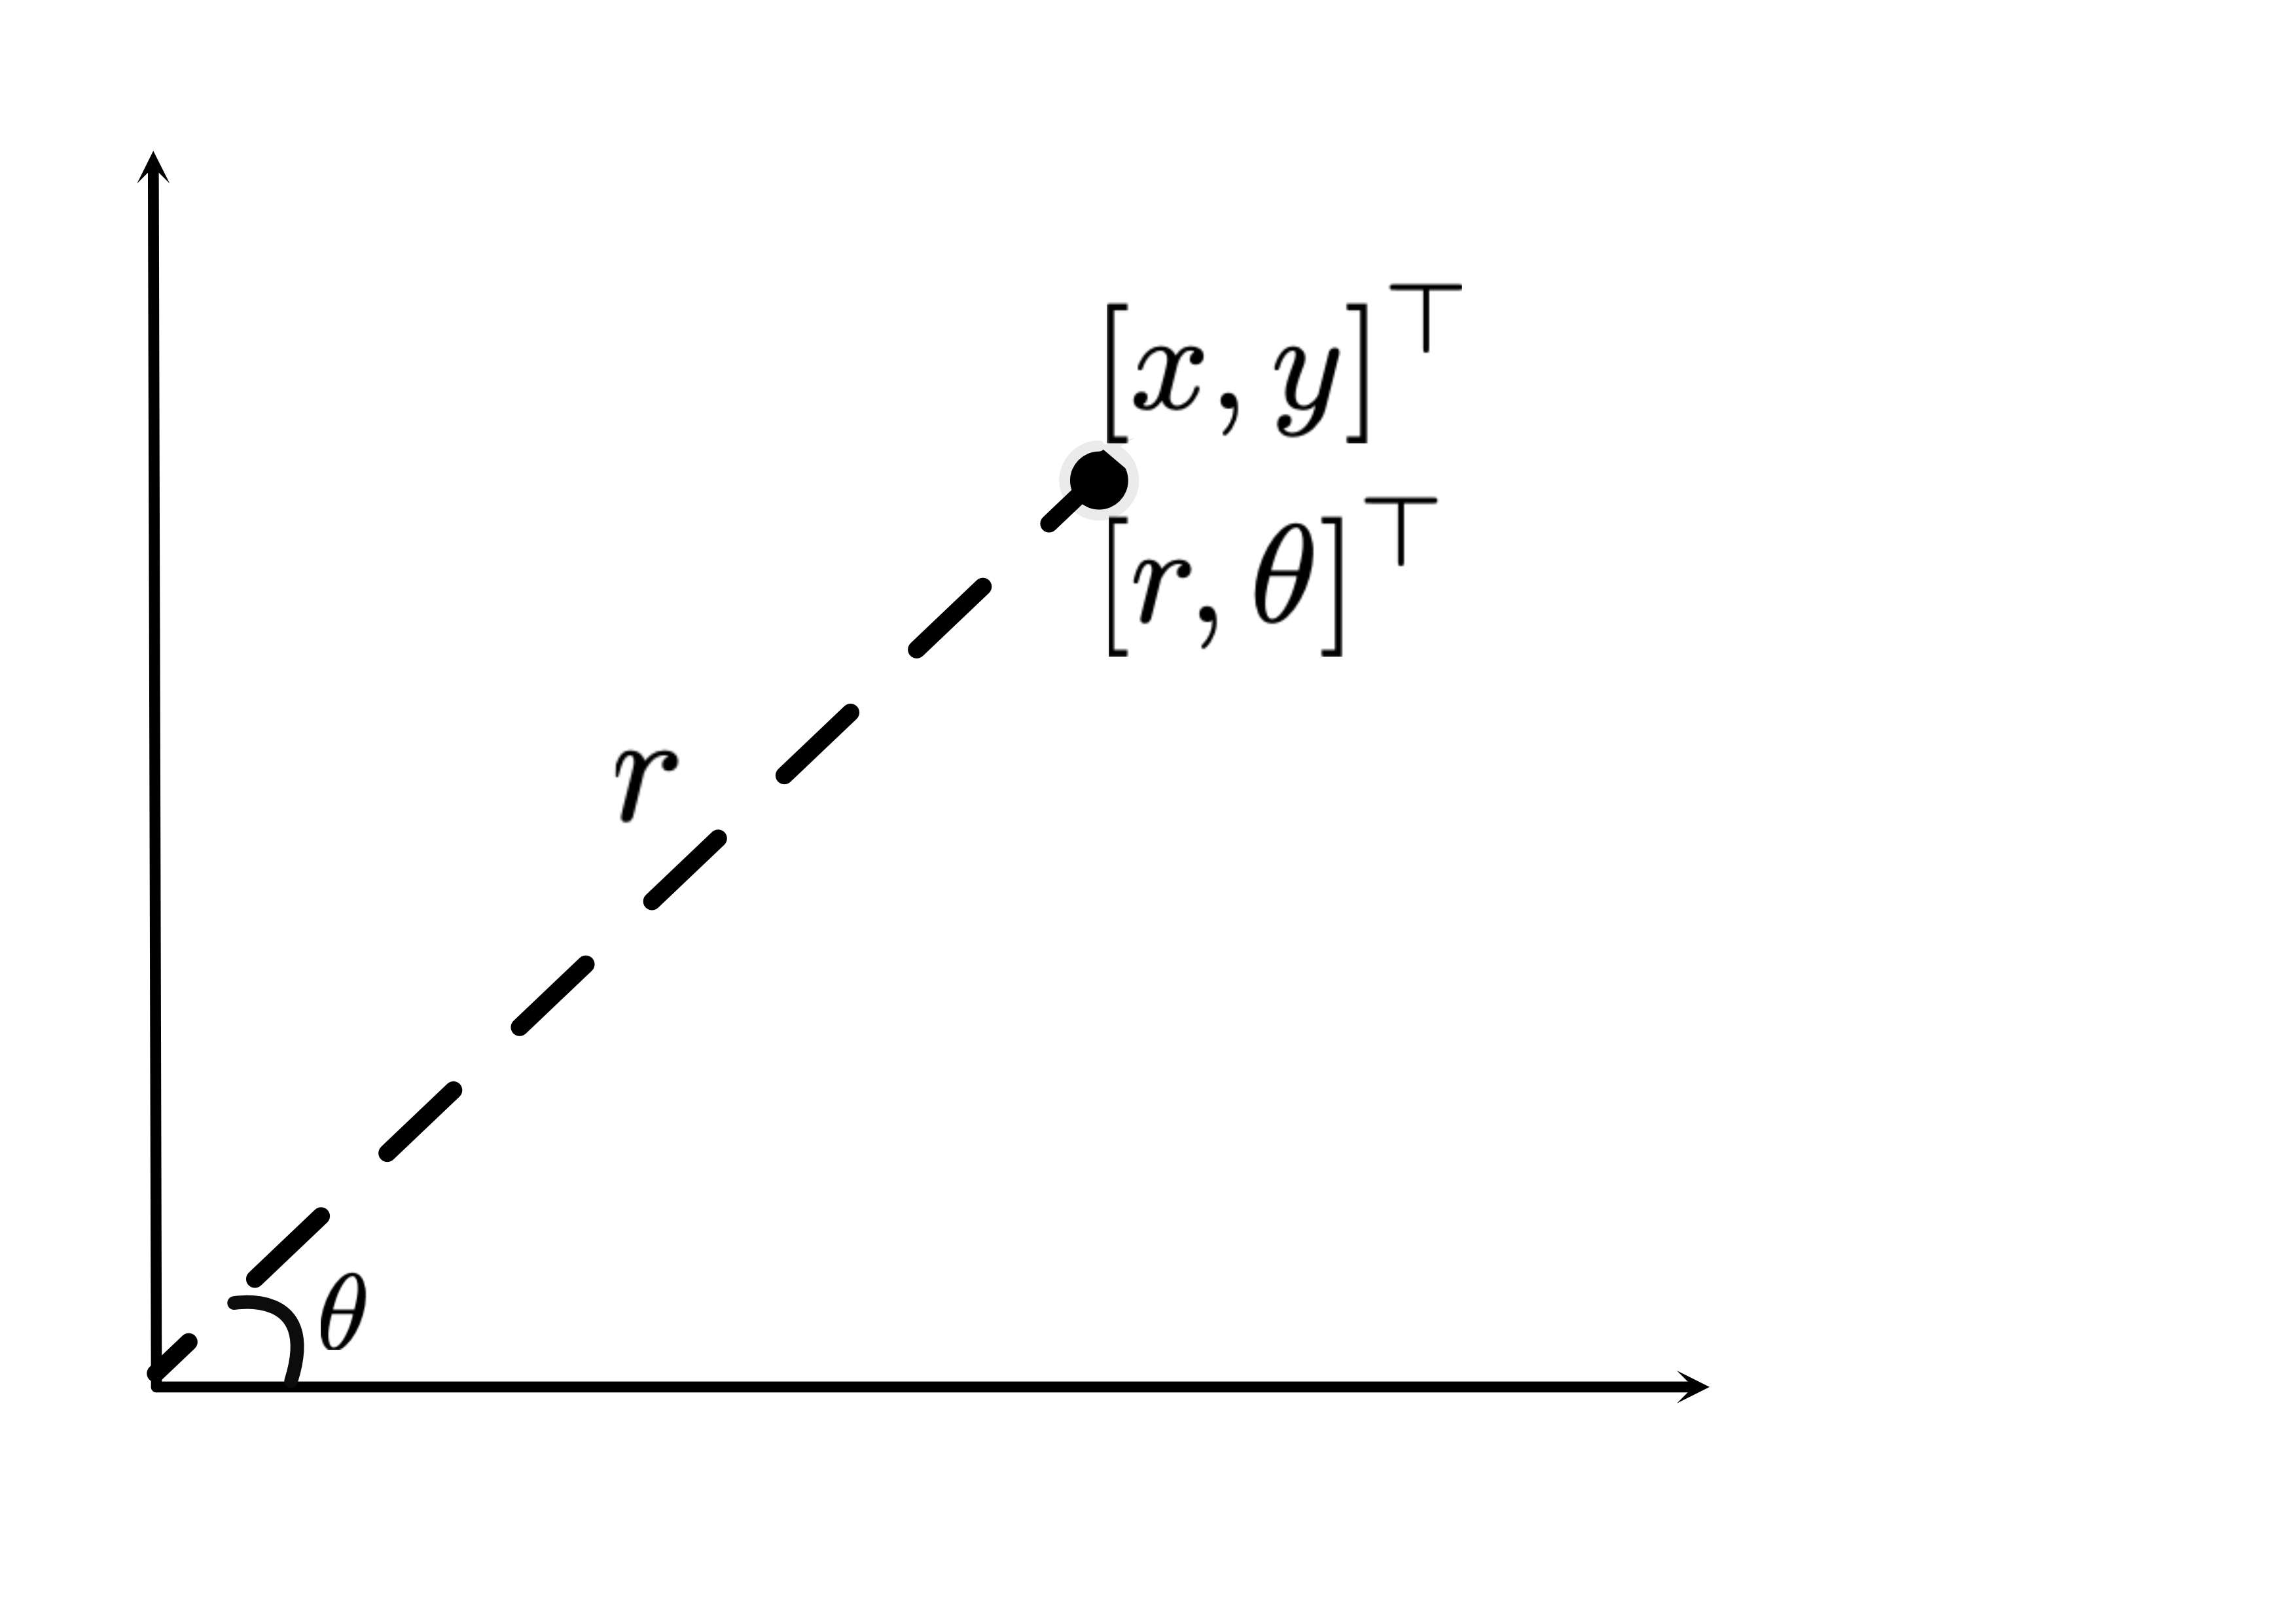

<figcaption class="figure-caption has-text-centered">Figure 1</figcaption>
</figure>
</div>

---
**Task 5 (easy): Polar coordinates👩‍💻💡**
The function `map_to_polar_separable`
 below non-linearly transforms each point $(x, y)$ to its polar coordinates $(r, \theta)$.
1. Run the cell below to visualize the dataset in polar coordinates. 
2. Compare the distribution of the data in polar versus Cartesian coordinates. What key differences do you observe?
3. Does transforming the data to polar coordinates make it easier to separate the classes with a linear classifier? How does this transformation change the classification problem?
4. Which parameter separates the classes?
5. Reflect on how pre-processing of data can change the models used for classification.
6. How is the non-linear transformation to polar coordinates different from using kernels for classification?


---

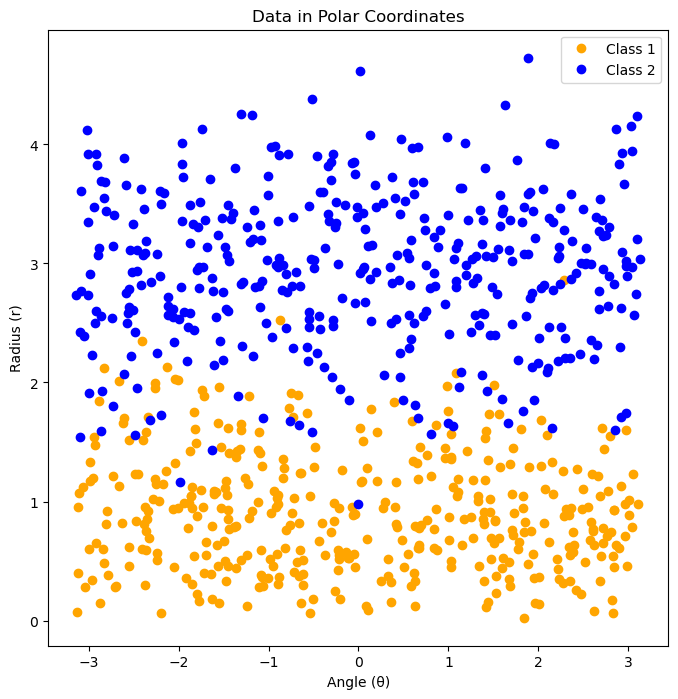

In [45]:
def map_to_polar_separable(data):
    """
    Maps circular data centered at (0, 0) to polar coordinates (r, theta),
    making the data linearly separable by radius (r).
 
    Parameters:
    - data: A numpy array of shape (N, 2) where each row is a point (x, y).
 
    Returns:
    - polar_data: A numpy array of shape (N, 2) where each row is (r, theta),
      where r is the radial distance and theta is the angle in radians.
    """
    # Convert to polar coordinates
    r = np.sqrt(data[:, 0]**2 + data[:, 1]**2)  # Radial distance
    theta = np.arctan2(data[:, 1], data[:, 0])  # Angle in radians
   
    # Stack r and theta to form polar data
    polar_data = np.column_stack((r, theta))
   
    return polar_data
   
data = np.vstack([q1, q2])  
polar_data=map_to_polar_separable(data)

# Split polar data into classes
polar_q1 = polar_data[:len(q1)]
polar_q2 = polar_data[len(q1):]

# Plot data in polar coordinates
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(polar_q1[:, 1], polar_q1[:, 0], "o", label="Class 1", color="orange")
ax.plot(polar_q2[:, 1], polar_q2[:, 0], "o", label="Class 2", color="blue")
plt.xlabel("Angle (θ)")
plt.ylabel("Radius (r)")
plt.title("Data in Polar Coordinates")
plt.legend()
plt.show()

## Task 5 reflection:

**Compare the distribution of the data in polar versus Cartesian coordinates. What key differences do you observe?**

What was before closer to the center is now closer to the bottom. Before the angle was around the center, now it goes horizontally.

**Does transforming the data to polar coordinates make it easier to separate the classes with a linear classifier? How does this transformation change the classification problem?**

Since angle is no longer around the center but instead horizontal, it makes the data much more linearly seperable.

**Which parameter separates the classes?**

The radius, which before was distance to center is now linear along the y-axis.

**Reflect on how pre-processing of data can change the models used for classification**
Pre-processing data by applying non-linear transformations such as converting Cartesian to polar coordinates can simplify complex classification problems. This step can enable the use of simpler models (e.g., linear classifiers) that might otherwise fail in the original data space. By reshaping the feature space to highlight separable structures, data transformations can improve model performance and reduce the need for complex algorithms.

**How is the non-linear transformation to polar coordinates different from using kernels for classification?**
Transforming data to polar coordinates is a pre-processing step that permanently changes the data representation. It is a straightforward mapping based on geometric properties. In contrast, using kernels in classification (e.g., SVM with an RBF kernel) implicitly maps data to a higher-dimensional space to make it separable, without changing the actual input features. Kernel methods allow complex decision boundaries without explicitly transforming the data, providing flexibility in capturing non-linear relationships while still training in the original feature space.